In [187]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [76]:
sns.set_context('notebook', font_scale=1.5)

In [2]:
food_df = pd.read_csv('en.openfoodfacts.org.products.tsv', sep="\t")

/Users/gabrielcs/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,36,37,38,39,48) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
food_df.shape

(333824, 162)

In [4]:
pd.set_option("display.max_columns", food_df.shape[1])
food_df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, corn oil ...",NaN,NaN,NaN,NaN,NaN,28 g (1 ONZ),NaN,0.0,[ banan

In [5]:
def percent_non_null(df):
    percent_non_null = pd.Series()
    total_count = len(df)

    for column in df.columns:
        percent_non_null[column] = 1 - (pd.isnull(df[column]).sum() / total_count)

    return percent_non_null

In [6]:
df_non_null = percent_non_null(food_df).sort_values(ascending=False)
df_non_null[:50]

last_modified_t                            1.000000
last_modified_datetime                     1.000000
creator                                    0.999994
created_t                                  0.999991
created_datetime                           0.999973
code                                       0.999928
url                                        0.999928
states_en                                  0.999856
states_tags                                0.999856
states                                     0.999856
countries_tags                             0.999206
countries_en                               0.999206
countries                                  0.999206
product_name                               0.947113
brands                                     0.912544
brands_tags                                0.912508
energy_100g                                0.817407
proteins_100g                              0.813755
salt_100g                                  0.800512
sodium_100g 

In [7]:
df_non_null['-lactose_100g']

0.00079682707055217517

In [8]:
null_name = pd.isnull(food_df['product_name'])
named_food_df = food_df[~(null_name)]
len(named_food_df)

316169

In [9]:
cheese_names = pd.Series(data=['gorgonzola', 'stilton', 'roquefort', 
                               'provolone',
                               'parmigiano', 'grana padano', 'gruyère', 'gruyere', 'emmental', 'edam', 
                               'gouda', 'brie', 'camembert', 
                               'pecorino', 'ricotta', 'feta', 'mascarpone'
                              ])

is_cheese = named_food_df['product_name'].str.lower().str.contains('|'.join(cheese_names))

In [10]:
def mozzarella_bufala_idx(df):
    bufala = ['buffalo', 'bufala']
    is_mozzarella_bufala = df['product_name'].apply(lambda product_name: 
                                                    'mozzarella' in product_name.lower() 
                                                    and any(name in product_name.lower() 
                                                            for name in bufala))
    return is_mozzarella_bufala

In [11]:
is_mozzarella_bufala = mozzarella_bufala_idx(named_food_df)

In [12]:
cheese_df = pd.DataFrame(named_food_df[(is_cheese) | (is_mozzarella_bufala)], copy=True)
len(cheese_df)

3695

In [13]:
category_counts = cheese_df['main_category_en'].value_counts()
category_counts

Dairies                                      767
Fresh foods                                  339
Plant-based foods and beverages              110
Meals                                         87
Sandwiches                                    75
Salty snacks                                  61
Frozen foods                                  46
Groceries                                     32
Sugary snacks                                 13
Beverages                                     10
Meats                                          8
fr:Ricotta                                     8
Spreads                                        8
Crêpes and galettes                            5
Desserts                                       3
Breaded products                               3
Terrine                                        3
Ricotta                                        2
Feta-cheese                                    2
fr:Sauces-chaudes                              2
Seafood             

In [14]:
non_cheese_cats = category_counts.index.drop(['Dairies', 'Spreads', 'fr:Ricotta', 'Ricotta', 'Brie-cheese',
                                              'Feta-cheese', 'Roquefort-cheese', 'fr:Fromage-rape-emmental',
                                              'Fromage-a-pate-dure', 'it:Pecorino', 'Stilton', 'it:Latticini',
                                              'it:Ricotta', 'fr:Grana-padano', 'fr:Mozarella', 
                                              'Camembert-cheese', 'de:Grana-padano', 'Grana-padano', 'Edam',
                                              'es:Queso-rallado', 'Fromages'])

to_drop = cheese_df['main_category_en'].str.contains('|'.join(non_cheese_cats))
to_drop = to_drop.fillna(False)
indices_to_drop = to_drop[to_drop].index

In [15]:
cheese_df.drop(indices_to_drop, inplace=True)
len(cheese_df)

2872

In [16]:
non_cheese_products = ['Gratin', 'Grignotine', 'Croustille', 'Avocado', 'Bouché', 'chips', 'Galette', 
                       'vegan', 'Vegetable', 'seed', "Witti's", 'Salad', 'Sugo', 'burger', 'Boulette', 
                       'pané', 'poulet', 'mimolette', 'Toastinette', 'Flammekueche', 'Tarte', 'crêpe',
                       'fondu', 'Nugget', 'Demi lune', 'jambon', 'Sandwich', 'Feuilleté','sauce',
                       'Bruschetta', 'Pâte', 'Tortellini', 'Risotto', 'STEAK', 'Saucisse', 'Douce',
                       'pomme', 'Épinard', 'croustillant', 'Cannelloni', 'Poulet', 'Gnocchi',
                       'Saumon', 'Biscuit', 'tomate', 'crudité', 'Tiramisu', 'hamburger', 'crackers',
                       'Croissant', 'Aubergine', 'Penne', 'mousse', 'apéritif', 'Spaghetti',
                       'Pringles', 'Pesto', 'Escalope', 'calzoni', 'Capelletti', 'Cappelletti',
                       'spinaci', 'RAVIOLONE', 'Prosciutto', 'Lasagne', 'Strudel', 'řepa',
                       'Beans', 'Medammas', 'Ravioli', 'Pizza', 'Quorn', 'Velouté', 'Concombre',
                       'NOODLES', 'Yogourt', 'Cascione', 'Poivres', 'Tortelloni', 'pumpkin', 
                       'Soupe', 'Tomato', 'Greenbrier', 'Gabriel', 'Cabrie', 'Cantabrie', 'Chicken',
                       'Spinach', 'Chocolate', 'strawberr', 'Popcorn', 'peanut', 'Topping',
                       'Turkey', 'Beef', 'Pinwheels', 'Sub', 'Quiche', 'Onion', 'Cake', 'Bread',
                       'Rice', 'Salam', 'Panino', 'Pepperoni', 'Salumi', 'Tort', 'Edamame',
                       'Limoncello', 'Crisps', 'Dip', 'Pastry', 'Balsamic', 'Twisters',
                       'Brien', 'potato', 'apple', 'pecan', 'Stick', 'olive', 'Carrot', 'Pasta',
                       'Blend', 'Roast', 'Toast', 'Vinaigrette', 'Crepe', 'Mezzaluna', 'Salsa',
                       'meringues', 'Baguette', 'Wasabi', 'Coppa', 'Gelato', 'Nougat', 'Briefbogen',
                       'Lentilles', 'Broccoli', 'Sausage', 'Bratwurst', 'Coque', 'Croquant',
                       'Craker', 'Heat', 'TARTINER', 'légumes', 'Lasagna', 'Twirl', 'Tofutti',
                       'Burrito', 'Boiled', 'Mushroom']

non_cheese_products = map(lambda x: x.lower(), non_cheese_products)

to_drop = cheese_df['product_name'].str.lower().str.contains('|'.join(non_cheese_products))
indices_to_drop = to_drop[to_drop].index

In [17]:
cheese_df.drop(indices_to_drop, inplace=True)
len(cheese_df)

2229

In [18]:
cheese_non_null = percent_non_null(cheese_df).sort_values(ascending=False)
cheese_non_null[:60]

code                                       1.000000
created_datetime                           1.000000
states                                     1.000000
states_tags                                1.000000
states_en                                  1.000000
last_modified_datetime                     1.000000
last_modified_t                            1.000000
product_name                               1.000000
creator                                    1.000000
url                                        1.000000
created_t                                  1.000000
countries                                  0.999551
countries_tags                             0.999551
countries_en                               0.999551
brands                                     0.949305
brands_tags                                0.947959
energy_100g                                0.858681
proteins_100g                              0.857784
salt_100g                                  0.842530
saturated-fa

In [19]:
cols_interest = ['product_name', 'fat_100g', 'saturated-fat_100g', 'cholesterol_100g', 'sodium_100g',
                 'salt_100g', 'sugars_100g', 'energy_100g', 'proteins_100g', 'calcium_100g', 
                 'vitamin-a_100g', 'additives_n', 'trans-fat_100g', '-lactose_100g']

In [20]:
cheese_df = cheese_df.loc[:, cols_interest]
cheese_df.head()

,product_name,fat_100g,saturated-fat_100g,cholesterol_100g,sodium_100g,salt_100g,sugars_100g,energy_100g,proteins_100g,calcium_100g,vitamin-a_100g,additives_n,trans-fat_100g,-lactose_100g
2464,Ricotta Cheese,4.03,2.42,0.024,0.089,0.22606,4.84,406.0,8.06,0.161,0.000048,1.0,0.0,NaN
2465,Ricotta Cheese Part Skim,8.06,4.84,0.032,0.121,0.30734,4.84,540.0,11.29,0.242,0.000194,1.0,0.0,NaN
2704,Chunk Feta Cheese,21.43,14.29,0.071,1.143,2.90322,3.57,1197.0,17.86,0.286,0.000214,0.0,0.0,NaN
2708,Crumbled Gorgonzola Cheese,28.57,17.86,0.089,0.929,2.35966,3.57,1494.0,25.00,0.536,0.000321,1.0,0.0,NaN
4182,Low Fat Ricotta Cheese,4.03,2.42,0.024,0.089,0.22606,4.84,406.0,8.06,0.161,0.000048,1.0,0.0,NaN


In [21]:
def plot_corr(corr):
    _, ax = plt.subplots(figsize=(10, 10))
    ax.set_title('Feature Correlations')
    g = sns.heatmap(corr, square=True, ax=ax)

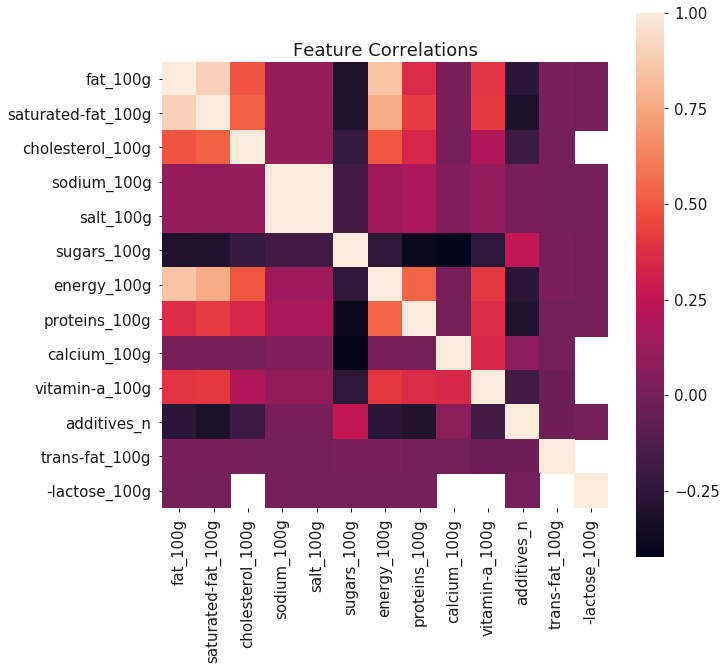

In [77]:
cheese_corr = cheese_df.corr()
plot_corr(cheese_corr)

We can see high correlation between `fat_100g` and `saturated-fat_100g` and between `fat_100g` and `energy_100g`, as well as between `salt_100g` and `sodium_100g`. Let's try to visualize those with joint plots:

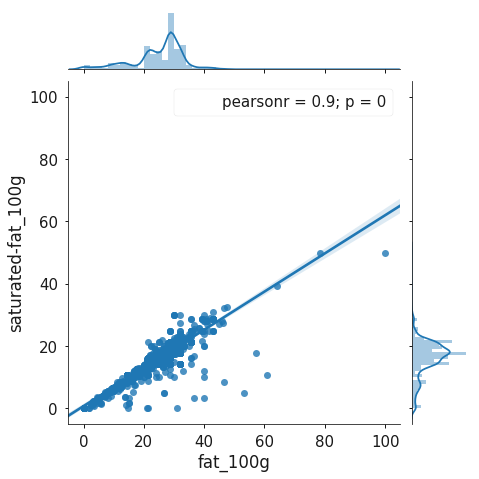

In [78]:
g = sns.jointplot("fat_100g", "saturated-fat_100g", data=cheese_df, kind="reg", 
                  xlim=(-5, 105), ylim=(-5, 105), size=7)

This is a very high correlation showing us that for each 8g of fat there usually is about 5g of saturated fat.

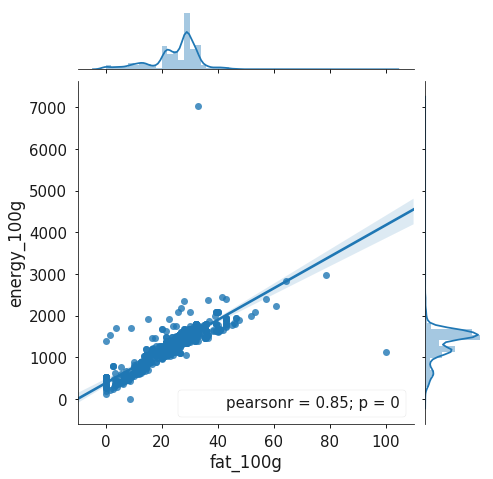

In [79]:
g = sns.jointplot("fat_100g", "energy_100g", data=cheese_df, kind="reg", size=7)

The correlation between `fat_100g` and `energy_100g` is not as strong as the previous one but still we found a high Person correlation coefficient of 0.85.

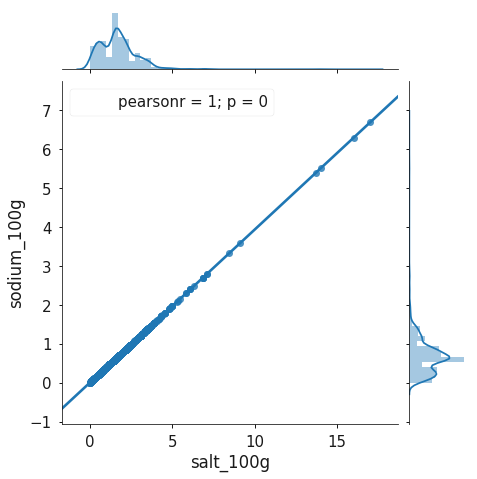

In [80]:
g = sns.jointplot("salt_100g", "sodium_100g", data=cheese_df, 
                  kind="reg", size=7)

This is a correlation with the Pearson coefficient set to 1, which indicates this is a perfect linear regression. For each 10g of salt there is about 3.5g of sodium.

Now let's enhance our DataFrame with cheese-specific data.

In [42]:
names = pd.Series(data=['gorgonzola', 'stilton', 'roquefort', 
                        'provolone',
                        'parmigiano', 'grana padano', 'gruyère', 'emmental', 'gouda', 'edam', 
                        'camembert', 'brie', 
                        'pecorino', 'feta', 'ricotta', 'mozzarella di bufala', 'mascarpone'])

colors = pd.Series(data=['blue', 'blue', 'blue', 
                         'yellow',
                         'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 'yellow', 
                         'yellow', 'white',
                         'white', 'white', 'white', 'white', 'white'])

texture = pd.Series(data=['soft', 'soft', 'hard', 
                          'hard',
                          'hard', 'hard', 'hard', 'hard', 'hard', 'hard', 
                          'soft', 'soft',
                          'hard', 'soft', 'soft', 'fresh', 'creamy'])

milk_source = pd.Series(data=['cow', 'cow', 'sheep', 
                              'cow',
                              'cow', 'cow', 'cow', 'cow', 'cow', 'cow', 
                              'cow', 'cow',
                              'sheep', 'sheep|goat', 'cow|sheep|goat|buffalo', 'buffalo', 'cow'])

smoked = pd.Series(data=[0, 0, 0, 
                         1,
                         0, 0, 0, 0, 0, 
                         0, 0, 0,
                         0, 0, 0, 0, 0]) 

cheese_types_df = pd.DataFrame(data=[names, colors, texture, milk_source, smoked],
                               index=['cheese_type', 'cheese_color', 'cheese_texture', 
                                      'cheese_milk_source', 'cheese_smoked']).T

cheese_types_df

,cheese_type,cheese_color,cheese_texture,cheese_milk_source,cheese_smoked
0,gorgonzola,blue,soft,cow,0
1,stilton,blue,soft,cow,0
2,roquefort,blue,hard,sheep,0
3,provolone,yellow,hard,cow,1
4,parmigiano,yellow,hard,cow,0
5,grana padano,yellow,hard,cow,0
6,gruyère,yellow,hard,cow,0
7,emmental,yellow,hard,cow,0
8,gouda,yellow,hard,cow,0
9,edam,yellow,hard,cow,0


In [27]:
cheese_counts = pd.Series()
for cheese_name in cheese_names:
    count = cheese_df['product_name'].str.lower().str.contains(cheese_name).sum()
    cheese_counts[cheese_name] = count

count = cheese_df['product_name'].str.lower().str.contains('mozzarella').sum()
cheese_counts['mozzarella di bufala'] = count

cheese_counts.sort_values(ascending=False)

emmental                332
gouda                   293
feta                    263
camembert               198
ricotta                 183
brie                    165
provolone               162
parmigiano              107
mozzarella di bufala     82
gorgonzola               78
mascarpone               65
roquefort                61
grana padano             60
gruyère                  59
edam                     49
pecorino                 44
gruyere                  33
stilton                  17
dtype: int64

In [28]:
gruyere = cheese_names[(cheese_names == 'gruyere') | (cheese_names == 'gruyère')]
cheese_names.drop(gruyere.index, inplace=True)
cheese_names.reset_index(drop=True, inplace=True)
cheese_names

0       gorgonzola
1          stilton
2        roquefort
3        provolone
4       parmigiano
5     grana padano
6         emmental
7             edam
8            gouda
9             brie
10       camembert
11        pecorino
12         ricotta
13            feta
14      mascarpone
dtype: object

In [29]:
def cheese_type_idx(df, cheese_name):
    return cheese_df['product_name'].str.lower().str.contains(cheese_name)

In [30]:
def gruyere_idx(df):
    return df['product_name'].str.lower().str.contains('gruyère|gruyere')

In [31]:
for cheese_name in cheese_names:
    indices = cheese_type_idx(cheese_df, cheese_name)
    cheese_df.loc[indices, 'cheese_type'] = cheese_name

moz_buf_indices = mozzarella_bufala_idx(cheese_df)
cheese_df.loc[moz_buf_indices, 'cheese_type'] = 'mozzarella di bufala'

gruyere_indices = gruyere_idx(cheese_df)
cheese_df.loc[gruyere_indices, 'cheese_type'] = 'gruyère'

In [32]:
cheese_df.head()

,product_name,fat_100g,saturated-fat_100g,cholesterol_100g,sodium_100g,salt_100g,sugars_100g,energy_100g,proteins_100g,calcium_100g,vitamin-a_100g,additives_n,trans-fat_100g,-lactose_100g,cheese_type
2464,Ricotta Cheese,4.03,2.42,0.024,0.089,0.22606,4.84,406.0,8.06,0.161,0.000048,1.0,0.0,NaN,ricotta
2465,Ricotta Cheese Part Skim,8.06,4.84,0.032,0.121,0.30734,4.84,540.0,11.29,0.242,0.000194,1.0,0.0,NaN,ricotta
2704,Chunk Feta Cheese,21.43,14.29,0.071,1.143,2.90322,3.57,1197.0,17.86,0.286,0.000214,0.0,0.0,NaN,feta
2708,Crumbled Gorgonzola Cheese,28.57,17.86,0.089,0.929,2.35966,3.57,1494.0,25.00,0.536,0.000321,1.0,0.0,NaN,gorgonzola
4182,Low Fat Ricotta Cheese,4.03,2.42,0.024,0.089,0.22606,4.84,406.0,8.06,0.161,0.000048,1.0,0.0,NaN,ricotta


In [127]:
merged_df = cheese_types_df.merge(cheese_df, how='right', left_on='cheese_type', right_on='cheese_type',
                                  suffixes=('', ''))

In [128]:
merged_df.head()

,cheese_type,cheese_color,cheese_texture,cheese_milk_source,cheese_smoked,product_name,fat_100g,saturated-fat_100g,cholesterol_100g,sodium_100g,salt_100g,sugars_100g,energy_100g,proteins_100g,calcium_100g,vitamin-a_100g,additives_n,trans-fat_100g,-lactose_100g
0,gorgonzola,blue,soft,cow,0,Crumbled Gorgonzola Cheese,28.57,17.86,0.089,0.929,2.35966,3.57,1494.0,25.00,0.536,0.000321,1.0,0.0,NaN
1,gorgonzola,blue,soft,cow,0,Wisconsin Gorgonzola Cheese Crumbles,28.57,21.43,0.071,1.357,3.44678,3.57,1494.0,21.43,0.000,0.000321,0.0,0.0,NaN
2,gorgonzola,blue,soft,cow,0,Gorgonzola Dolcina Cheese,32.14,17.86,0.100,1.093,2.77622,0.00,1552.0,21.43,0.464,0.000214,0.0,0.0,NaN
3,gorgonzola,blue,soft,cow,0,Crumbled Gorgonzola Cheese,28.57,17.86,0.054,1.250,3.17500,3.57,1494.0,21.43,0.321,0.000214,1.0,0.0,NaN
4,gorgonzola,blue,soft,cow,0,"Spring Haven Farms, Crumbled Gorgonzola Cheese",28.57,21.43,0.071,1.357,3.44678,0.00,1494.0,21.43,0.536,0.000321,0.0,0.0,NaN


Let's start by examining salt and sodium per cheese type:

In [159]:
def salt_bar_plot(df, y, height, legend_loc='best'):
    f, ax = plt.subplots(figsize=(14, height))

    sns.set_color_codes("pastel")
    sns.barplot(x="salt_100g", y=y, data=df, label="salt per 100g", color="b")

    sns.set_color_codes("muted")
    sns.barplot(x="sodium_100g", y=y, data=df, label="sodium per 100g", color="b")

    ax.legend(loc=legend_loc)
    ax.set(xlabel="Salt and sodium per 100g")
    sns.despine(left=True, bottom=True)

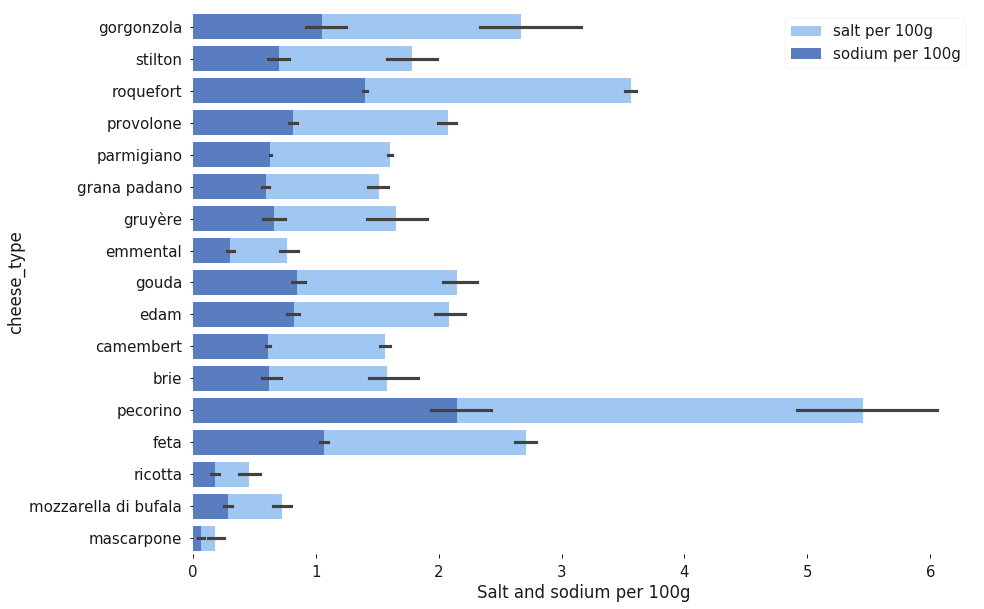

In [160]:
salt_bar_plot(merged_df, 'cheese_type', 10)

We can see that pecorino is by far the saltiest cheese type in our analysis. Roquefort comes second. Feta and gorgonzola complete the top 4.

As expected, mascarpone has the least salt, followed by ricotta, mozzarella di buffala and emmental.

Let's now analyse fat and saturated fat:

In [157]:
def fat_bar_plot(df, y, height, legend_loc='best'):
    f, ax = plt.subplots(figsize=(14, height))

    sns.set_color_codes("pastel")
    sns.barplot(x="fat_100g", y=y, data=df, label="fat per 100g", color="b")

    sns.set_color_codes("muted")
    sns.barplot(x="saturated-fat_100g", y=y, data=df, label="saturated per 100g", color="b")

    ax.legend(loc=legend_loc)
    ax.set(xlabel="Fat and saturated fat per 100g")
    sns.despine(left=True, bottom=True)

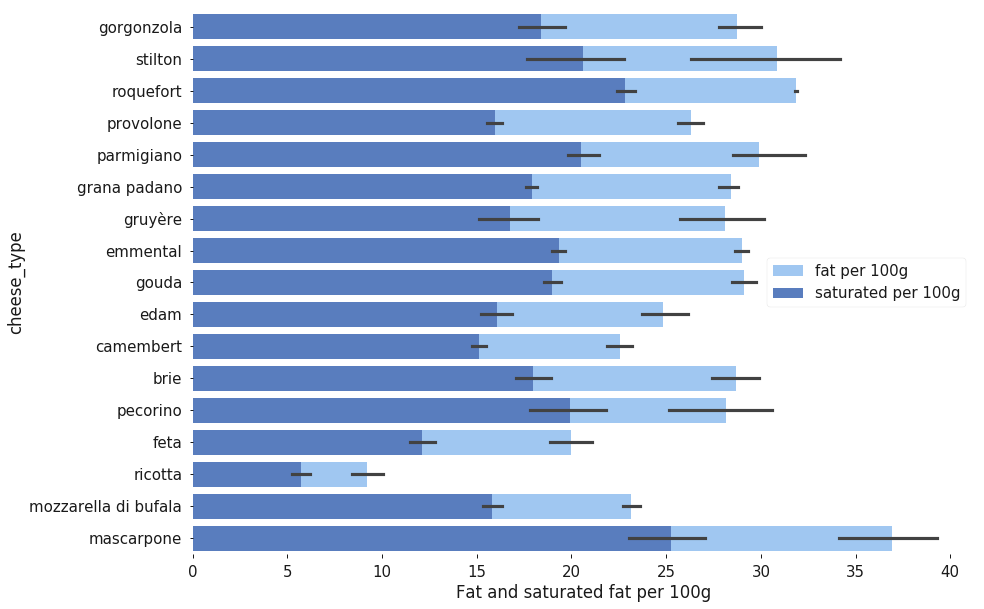

In [158]:
fat_bar_plot(merged_df, 'cheese_type', 10)

We can see from the plot above that mascarpone is the fattest cheese, also with the highest amounts of saturated fat. Roquefort comes second and Stilton third.

Ricotta is by far the less fat cheese type, while feta comes second.

## Cheese color

Now, is it myth or fact that the more yellow the cheese the fatter it is?

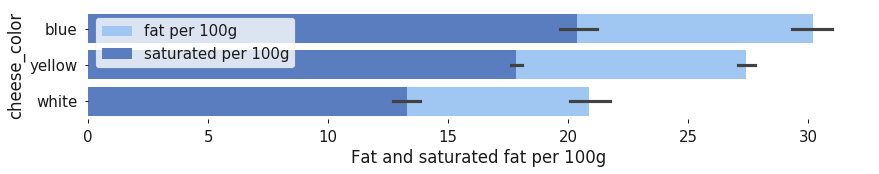

In [165]:
fat_bar_plot(merged_df, 'cheese_color', 2)

Although mascarpone, pecorino and brie should bring the whites up, ricotta brings it down.

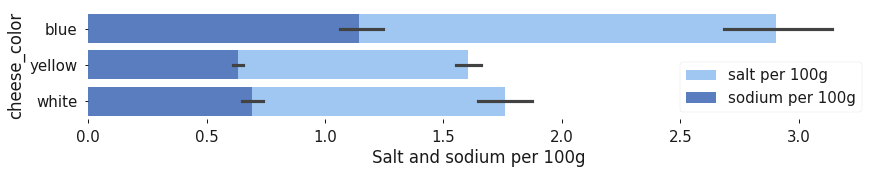

In [166]:
salt_bar_plot(merged_df, 'cheese_color', 2)

Although white and yellow cheeses seem very similar when it comes to salt, it is fair to say that blue cheese in general is saltier.

## Cheese texture

Let's see if we can find any pattern by cheese texture:

Just for fun, let's do the same for texture and source of milk: 

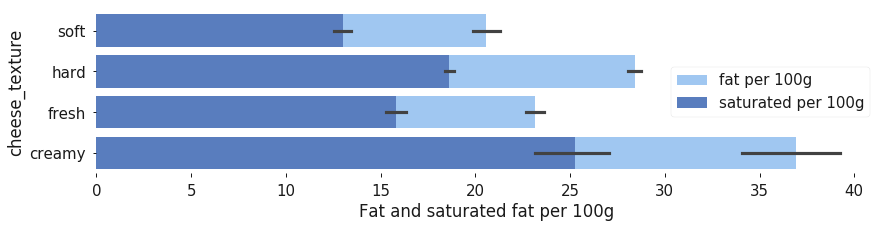

In [147]:
fat_bar_plot(merged_df, 'cheese_texture', 3)

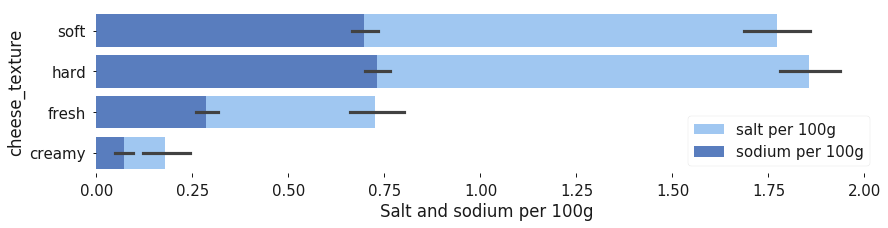

In [167]:
salt_bar_plot(merged_df, 'cheese_texture', 3)

It also became clear that creamy and fresh cheeses tend to have less salt and sodium than soft and hard ones, although the only creamy cheese type we have in our data is mascarpone and the only fresh type is mozzarella di bufala.

## Milk source

To better analyse milk source, let's first drop the types of cheeses that have either varying or mixed milk sources.

As the only remaining cheese made of buffalo milk is mozzarella di bufala and the only remaining cheeses made of sheep milk are pecorino and roquefort, we might not have enough cheese type samples. Let's do the analysis and see what it gives us with that in mind:

In [183]:
to_drop = merged_df['cheese_milk_source'].apply(lambda s: 
                                        not any(s == source for source in ['sheep', 'goat', 'buffalo', 'cow']))

milk_source_df = merged_df.drop(to_drop[to_drop].index)

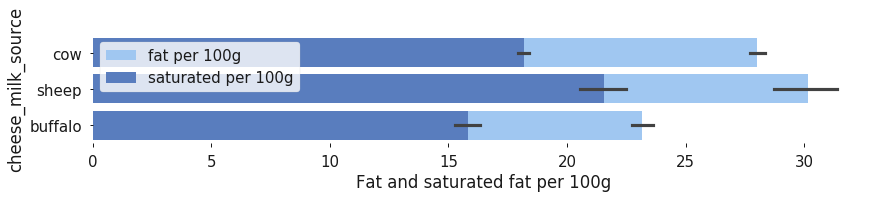

In [216]:
fat_bar_plot(milk_source_df, 'cheese_milk_source', 2)

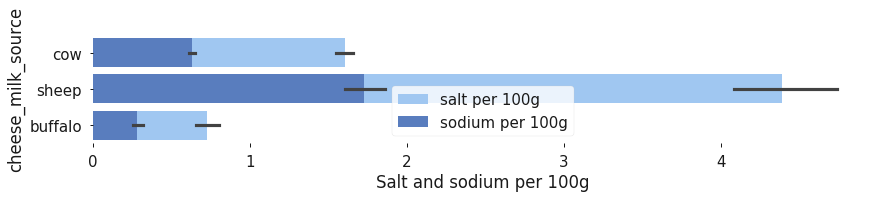

In [217]:
salt_bar_plot(milk_source_df, 'cheese_milk_source', 2)

The major difference is regarding salt. As pecorino and roquefort and the 2 single saltiest cheese types in our analysis, it shows it cheese made of sheep milk tend to be saltier.

Buffalo milk cheese came as less salty, maybe because mozzarella di bufala is our only cheese type in that caetgory.

## Additional data

Let's now aggregate the data and calculate the medians for each feature. That is effective in removing outliers and it could give us a picture of cheese types even for columns with a high number of `NaN`s.

In [218]:
type_grouped = merged_df.groupby('cheese_type')

In [245]:
aggregate_df = type_grouped.median(numeric_only=True)
aggregate_df

,fat_100g,saturated-fat_100g,cholesterol_100g,sodium_100g,salt_100g,sugars_100g,energy_100g,proteins_100g,calcium_100g,vitamin-a_100g,additives_n,trans-fat_100g,-lactose_100g
cheese_type,,,,,,,,,,,,,
brie,29.500,17.86,0.089,0.590551,1.50000,0.03,1473.0,17.00,0.357,0.000214,0.0,0.0,NaN
camembert,22.000,15.00,0.071,0.629921,1.60000,0.50,1169.0,20.00,0.357,0.000214,0.0,0.0,0.1
edam,24.000,16.00,0.089,0.788701,2.00330,0.00,1336.5,25.00,0.750,0.000321,1.0,0.0,NaN
emmental,29.000,19.50,0.089,0.275591,0.70000,0.10,1561.0,27.00,1.000,0.000321,0.0,0.0,0.1
feta,21.430,14.29,0.071,1.143000,2.90322,0.00,1120.0,17.86,0.286,0.000214,0.0,0.0,NaN
gorgonzola,28.570,17.86,0.089,0.956626,2.42983,0.00,1494.0,21.43,0.536,0.000321,0.0,0.0,NaN
gouda,30.000,19.05,0.100,0.787402,2.00000,0.00,1515.0,25.00,0.714,0.000261,1.0,0.0,0.1
grana padano,29.000,18.00,0.089,0.590551,1.50000,0.00,1654.0,33.00,1.165,0.000214,1.0,0.0,NaN
gruyère,32.000,19.00,0.089,0.590551,1.50000,0.00,1644.0,27.00,0.893,0.000321,0.0,0.0,NaN


In [246]:
aggregate_df = cheese_types_df.merge(aggregate_df, how='outer', left_on='cheese_type', right_index=True,
                                     suffixes=('', ''))

In [247]:
aggregate_df

,cheese_type,cheese_color,cheese_texture,cheese_milk_source,cheese_smoked,fat_100g,saturated-fat_100g,cholesterol_100g,sodium_100g,salt_100g,sugars_100g,energy_100g,proteins_100g,calcium_100g,vitamin-a_100g,additives_n,trans-fat_100g,-lactose_100g
0,gorgonzola,blue,soft,cow,0,28.570,17.86,0.089,0.956626,2.42983,0.00,1494.0,21.43,0.536,0.000321,0.0,0.0,NaN
1,stilton,blue,soft,cow,0,35.000,22.93,0.089,0.786000,1.99644,0.10,1644.0,23.70,0.339,0.000321,0.0,0.0,NaN
2,roquefort,blue,hard,sheep,0,32.000,22.50,NaN,1.417323,3.60000,0.00,1507.0,19.00,NaN,NaN,0.0,NaN,NaN
3,provolone,yellow,hard,cow,1,28.120,16.67,0.071,0.857000,2.17678,0.00,1494.0,25.00,0.714,0.000281,0.0,0.0,NaN
4,parmigiano,yellow,hard,cow,0,28.400,20.00,0.089,0.629921,1.60000,0.00,1644.0,32.40,1.160,0.000214,0.0,0.0,NaN
5,grana padano,yellow,hard,cow,0,29.000,18.00,0.089,0.590551,1.50000,0.00,1654.0,33.00,1.165,0.000214,1.0,0.0,NaN
6,gruyère,yellow,hard,cow,0,32.000,19.00,0.089,0.590551,1.50000,0.00,1644.0,27.00,0.893,0.000321,0.0,0.0,NaN
7,emmental,yellow,hard,cow,0,29.000,19.50,0.089,0.275591,0.70000,0.10,1561.0,27.00,1.000,0.000321,0.0,0.0,0.1
8,gouda,yellow,hard,cow,0,30.000,19.05,0.100,0.787402,2.00000,0.00,1515.0,25.00,0.714,0.000261,1.0,0.0,0.1
9,edam,yellow,hard,cow,0,24.000,16.00,0.089,0.788701,2.00330,0.00,1336.5,25.00,0.750,0.000321,1.0,0.0,NaN


In [273]:
def bar_plot(col, aggr, height, palette='muted'):
    data = aggregate_df.dropna(subset=[col]).sort_values(by=[col], ascending=False)

    f, ax = plt.subplots(figsize=(14, height))
    sns.set_color_codes(palette)
    sns.barplot(x=col, y=aggr, data=data, color="b")
    sns.despine(left=True, bottom=True)

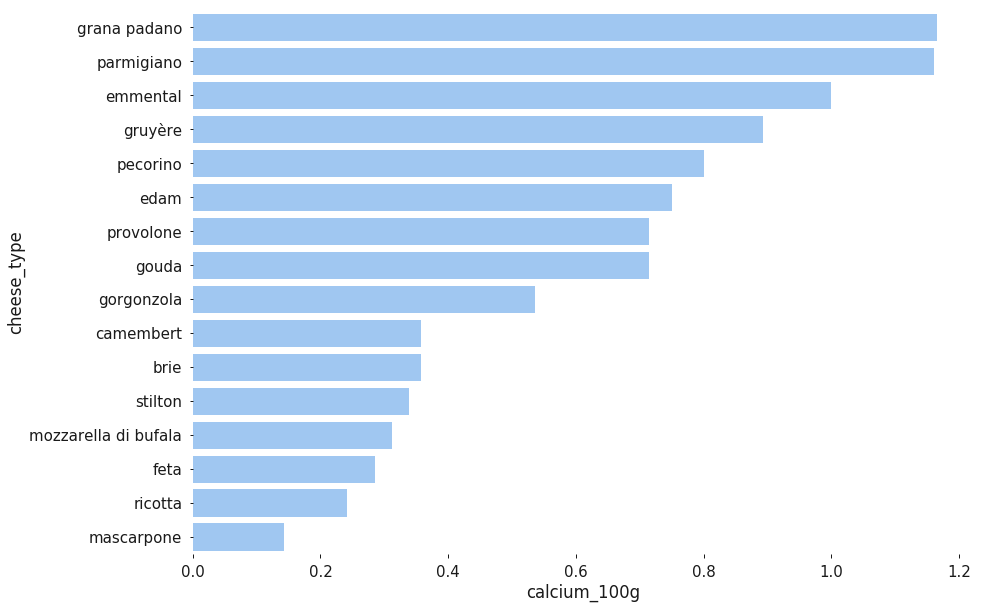

In [275]:
bar_plot(col='calcium_100g', aggr='cheese_type', height=10, palette='pastel')

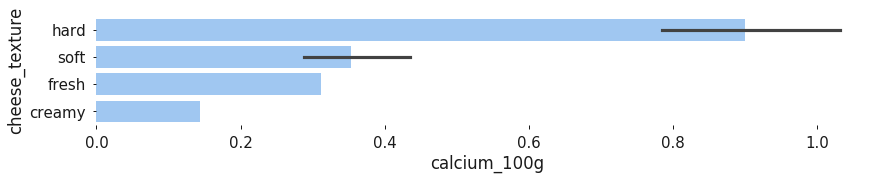

In [276]:
bar_plot(col='calcium_100g', aggr='cheese_texture', height=2, palette='pastel')

We can see that grana padano and parmigiano are the cheese types with the highest amounts of calcium, and also that cheeses with a hard texture tend to have more calcium than cheeses that are soft, fresh or creamy.

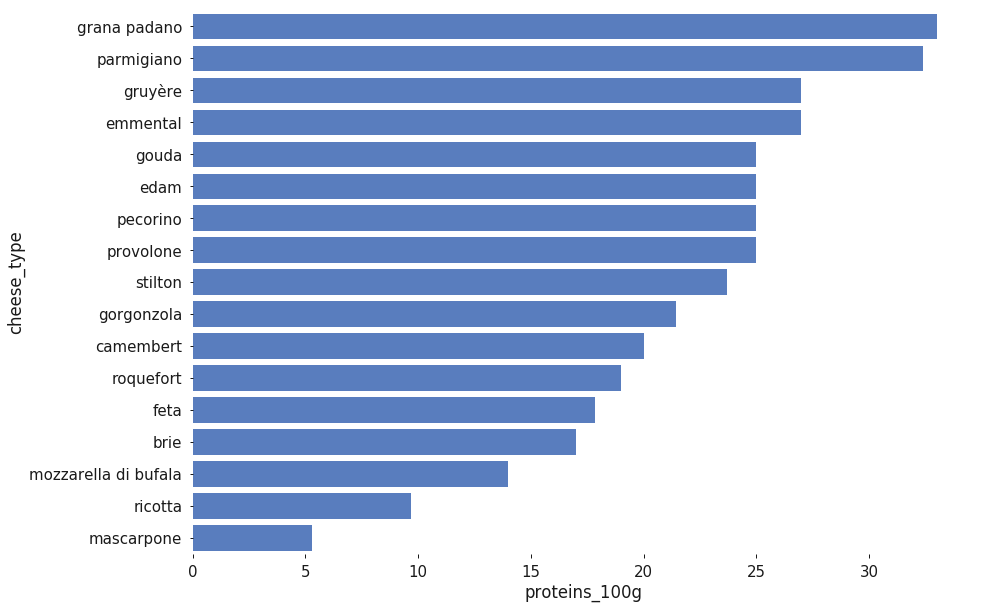

In [277]:
bar_plot(col='proteins_100g', aggr='cheese_type', height=10, palette='muted')

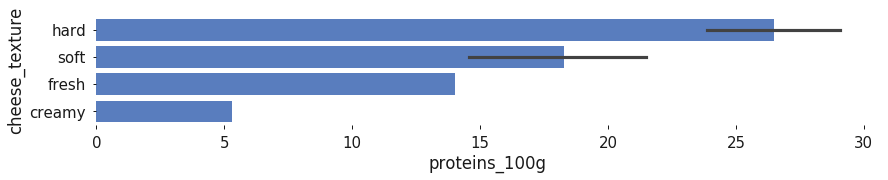

In [278]:
bar_plot(col='proteins_100g', aggr='cheese_texture', height=2, palette='muted')

We can also see that hard cheeses tend to have more proteins, again with parmigiano and grana padano leading the way, while soft, fresh and creamy cheeses tend to have less, in that order.